# When to use Regression Trees ?
When Predictions are continuous values instead of discrete classes.

#  Steps to Implement Regression Trees from Scratch
- Generate Data - Create a synthetic dataset for training.
- Implement Splitting Criteria - Use Mean Squared Error (MSE) instead of entropy/Gini.
- Build the Tree
--   	 Define stopping conditions (max depth, min samples per split).
--   	 Find best feature & threshold to split.
--   	 Recursively build left & right nodes.
- Make Predictions - Traverse the tree for new data points.
- Evaluate Performance - Use MSE or R2 score to check accuracy.
- Visualize the Decision Boundary


# Generating a Sythetic dataset for training

## Think of it like:
- We measure kids heights and try to predict their weight using height^2,but there is some random variation
(some kids are heavier or lighter than expected).

## Final Output?
- X is a sorted list of numbers (0 to 10).
- y follows a parabolic shape (X²) but has random ups and downs to make it more real.

In [7]:
import numpy as np

np.random.seed(22)
X=np.sort(10*np.random.rand(100,1),axis=0) 
# np.random.rand(100,1) will create 100 random values between 0 to 1.Multiplying it by 10 
# will create values between 0 to 10. Sort(axis=0) will sort the values in ascending order 

y=X.flatten()**2+np.random.rand(100)*5
# X.flatten()**2 will square each number in X so that the bigger values grow even bigger and np.random.rand(100)*5 will add
# noise to the values between 0 to 5

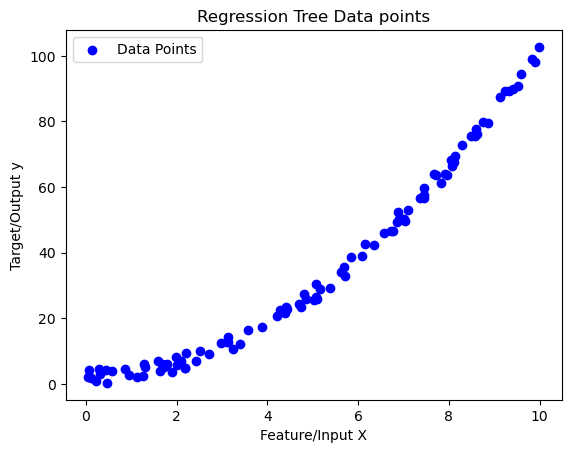

In [38]:
# Plot the data 
import matplotlib.pyplot as plt

plt.scatter(X,y,color='blue',label='Data Points')
plt.xlabel('Feature/Input X')
plt.ylabel('Target/Output y')
plt.title('Regression Tree Data points')
plt.legend()
plt.show()

# Implementing the Splitting Criteria

Now this time instead of using Gini or Entropy , we will be using the MSE(Mean Squared Error) in case of Regression Tree

## Steps for Splitting Criteria:
-  Calculate MSE of the entire dataset (before the split) To understand how much error we currently have
-  Try different split points (loop through all possible feature values).
-  Split the data into left and right nodes.
-  Calculate MSE for left and right nodes.
-  Compute the weighted average of both MSEs.
-  Find the split point that minimizes the overall MSE.

### Step 1 . Calculate MSE for entire dataset
- Find the mean of all y values 
- Subtract this mean from each y value
- Square the errors and take average 

In [9]:
def MSE(y):
    # Calculating the mean of all y values 
    y_mean=np.mean(y)
    # Subtracting mean from each y value , square the errors and take average
    return np.mean((y - y_mean)**2)   

In [10]:
# Testing the MSE
print(MSE(y))

892.4376641494458


### Step 2 : Try different split points (loop through all possible feature values)

We need to divide our data into two parts(left and right) at a certain point(threshold).
The goal is to find the best split that gives us the lowest MSE .

### But how do we find the best split?
For each possible split point or threshold we divide the data into Left and Right. Left values <= threshold while Right values>Threshold


- So we need to calculate the MSE for Left and Right parts
- Then Calculate Total Weghted MSE of the whole split
- Choose the split that gives the lowest MSE

In [11]:
def Best_Split(X,y):
    best_MSE=float('inf') # Starting with a very high MSE
    best_split=None
    
    # For each possible split point in X 
    for i in range(1,len(X)):
        # dividing the data into Left and Right
        y_left=y[:i]
        y_right=y[i:]
        
        # Calculating the MSE for left and right parts
        mse_left=MSE(y_left)
        mse_right=MSE(y_right)
        
        # Calculate the Weighted MSE
        weighted_MSE=(mse_left*len(y_left)+mse_right*len(y_right))/len(y)
        
        # Compare the Weighted MSE with the best_MSE
        if weighted_MSE<best_MSE:
            best_MSE=weighted_MSE
            best_split=X[i]
    return (best_split,best_MSE)

In [12]:
# Find the best split
split_point, min_mse = Best_Split(X, y)
print(f"Best split at: {split_point}, Minimum MSE: {min_mse}")

Best split at: [6.15205825], Minimum MSE: 192.22596553290165


In [13]:
# Comparing the MSE we got with the original MSE before the split
print(f'original MSE : ',MSE(y))
print(f"Best split at: {split_point}, Minimum MSE: {min_mse}")

original MSE :  892.4376641494458
Best split at: [6.15205825], Minimum MSE: 192.22596553290165


Observation : The minimum MSE we got after finding the best split is much smaller than the Original MSE before the split.

# Build the Tree Recursively 

## Steps :
- Check the stopping conditions so that we know when to stop splitting
- Find the best split (we will call the Best_Split method above)
- Split the data into left and right subtree 
- Recursively build the left and right nodes 
- Return a Tree Node (storing feature, threshold, and child nodes)

### What are the Stopping Conditions?
- If the number of samples are smaller than the min_sample_split value we have specified
- If MSE is very low meaning that the data is perfect and no split is required 
- If we have reached the max_depth of the tree 

In [14]:
def Regression_Tree(X,y,depth=0,max_depth=5,min_sample_split=5):
    # Check the Stopping Conditions
    if len(y)<min_sample_split or MSE(y)<1e+6 or depth>=max_depth:
        return np.mean(y) # Return the average of y as a leaf node value
    
    # Finding the best split
    best_threshold,best_MSE=Best_Split(X,y)
    
    # Split the data into left<=threshold or right>threshold
    left_mask=X.flatten()<=best_threshold  
    right_mask=X.flatten()>best_threshold
    # We used flatten() here because X is a 2D array so we converted it to 1D and threshold
    # is a single/ scaler value.Numpy expects values of both X and threshold to be compatible else we will get a shape mismatch
    # error.
    X_left,y_left=X[left_mask],y[left_mask]
    X_right,y_right=X[right_mask],y[right_mask]
    
    # If one side of the tree is empty then return mean value
    if len(y_left) == 0 or len(y_right) == 0:
        return np.mean(y)  
    
    # Recursively build the left and right nodes 
    left_subtree=Regression_Tree(X_left,y_left,depth+1,max_depth=5,min_sample_split=5)
    right_subtree=Regression_Tree(X_right,y_right,depth+1,max_depth=5,min_sample_split=5)
    
    # Return a Tree Node 
    return {"threshold": best_threshold, "left": left_subtree, "right": right_subtree}
    
    

In [15]:
tree = Regression_Tree(X, y)
print(tree)

36.005708560443


## Issues Faced  in the Regression_Tree and how they were fixed
Observation : The Regression_Tree function had returned a single value which means that the stopping condition was triggered immediately. This may have happened due to low MSE or the len(y)<min_sample_split. Since stopping condition was met the function had returned mean(y). 

How this issue was fixed:
- increased the MSE(y) to 1 rather than 1e+6 because 1e+6 is a very small value and our dataset is already small so it might be having a small MSE
- Reduced the min sample split. Instead of 5 I went for 2 so that more number of splits occur
- Increased the max_depth so that the tree does not stop to early. 
    

In [16]:
def Regression_Tree(X,y,depth=0,max_depth=10,min_sample_split=2): # max_depth set to 10 and min_sample split set to 2
    # Check the Stopping Conditions
    if len(y)<min_sample_split or MSE(y)<1 or depth>=max_depth:  # MSE<1 fixed 
        return np.mean(y) # Return the average of y as a leaf node value
    
    # Finding the best split
    best_threshold,best_MSE=Best_Split(X,y)
    
    # Split the data into left<=threshold or right>threshold
    left_mask=X.flatten()<=best_threshold  
    right_mask=X.flatten()>best_threshold
    # We used flatten() here because X is a 2D array so we converted it to 1D and threshold
    # is a single/ scaler value.Numpy expects values of both X and threshold to be compatible else we will get a shape mismatch
    # error.
    X_left,y_left=X[left_mask],y[left_mask]
    X_right,y_right=X[right_mask],y[right_mask]
    
    # If one side of the tree is empty then return mean value
    if len(y_left) == 0 or len(y_right) == 0:
        return np.mean(y)  
    
    # Recursively build the left and right nodes 
    left_subtree=Regression_Tree(X_left,y_left,depth+1,max_depth=5,min_sample_split=5)
    right_subtree=Regression_Tree(X_right,y_right,depth+1,max_depth=5,min_sample_split=5)
    
    # Return a Tree Node 
    return {"threshold": best_threshold, "left": left_subtree, "right": right_subtree}
    

In [17]:
tree = Regression_Tree(X, y)
print(tree)

{'threshold': array([6.15205825]), 'left': {'threshold': array([4.20538035]), 'left': {'threshold': array([2.51835511]), 'left': {'threshold': array([1.28333902]), 'left': 3.1221755921687406, 'right': {'threshold': array([2.20404517]), 'left': 5.958269711994093, 'right': 8.444591399595048}}, 'right': {'threshold': array([3.5764317]), 'left': 12.684133107554738, 'right': 18.979299003022142}}, 'right': {'threshold': array([5.61203697]), 'left': {'threshold': array([5.08090163]), 'left': {'threshold': array([4.81681062]), 'left': 23.710343404534452, 'right': 27.071764684973367}, 'right': 29.64379294416385}, 'right': {'threshold': array([5.84289643]), 'left': 35.84671597298461, 'right': 40.877607751530164}}}, 'right': {'threshold': array([8.28540365]), 'left': {'threshold': array([7.3666623]), 'left': {'threshold': array([6.84828719]), 'left': {'threshold': array([6.57311303]), 'left': 44.16406184958733, 'right': 47.640242833492685}, 'right': 51.782547405912105}, 'right': {'threshold': arr

Observation : Now we got the correct output. In the output I see that the root node splits at [6.15205825] and this is the same value we got in Best_split function.

# Implementing Prediction logic to predict values for new data points 

## Defining a function by passing a single data point 
- We will be passing the tree which is a dictionary which holds three values {threshold,left,right} and we will pass a single data point x
- We traverse the tree recursively to predict for one data point 
- If we reach a leaf node ie. when the tree has only one int/float value, we return it as the prediction 
- But to reach to that single prediction value we need to go left and right depending on whether the data point x is less that or greater than the threshold value of the tree. 

In [18]:
def predict_single(tree,x): # Pass tree{threshold,left,right} and a single data point x
    if isinstance(tree,(int,float)): # If the tree has only one value left of datatype int/float
        return tree # Return that value as the leaf node / Prediction
    
    # Following the Left/Right Path to reach the Prediction
    threshold=tree['threshold']
    if x<=threshold:
        return predict_single(tree['left'],x)
    else : #if x>threshold:
        return predict_single(tree['right'],x)
    

## Predicting for multiple Points 

In [30]:
def predict(tree,X_test):
        return np.array([predict_single(tree,x)for x in X_test])


In [31]:
# Test points 
X_test = np.array([2,5.5,7.8,9.3,1.22,4.37])

# Predict values 
predictions = predict_multiple(tree, X_test)

# Print predictions
print("Predictions for X_test:", predictions)

Predictions for X_test: [ 5.95826971 29.64379294 64.20613263 90.77218018  3.12217559 23.7103434 ]


# Visualization

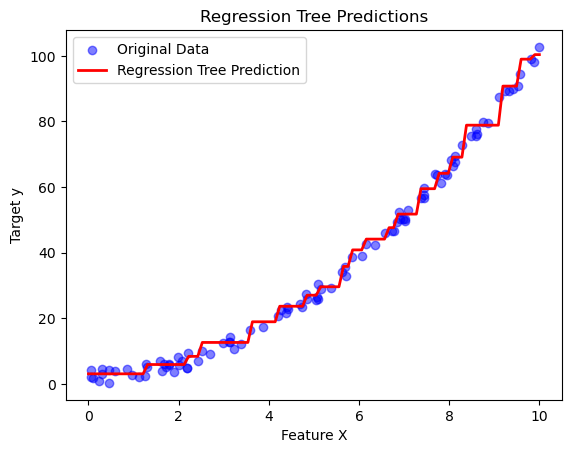

In [32]:
# Create 100 evenly spaces data points from 0 to 10
X_test=np.linspace(0,10,100).reshape(-1,1)  # Reshaping 1D array generated from linspace into a 2D array
# We had trained the data on a 2D array.If our test data is 1D,it could cause shape mismatch errors when passed into functions
# expecting 2D input 

# Predict y values using predict_multiple function
y_pred=predict_multiple(tree,X_test)


# Plot Original data points 
plt.scatter(X, y, color="blue", label="Original Data",alpha=0.5) # alpha is to control the color transperency of the points 
# aplha=1 --> solid color , alpha=0.6 ---> semi transparent  , alpha=0 --> invisble

# Plot regression tree predictions 
plt.plot(X_test, y_pred, color="red", label="Regression Tree Prediction",linewidth=2)

plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.title("Regression Tree Predictions")
plt.legend()
plt.show()

Observation : Here the blue dots are the original data points (X,y) where as the Feature X grows, the target value y also gets bigger and bigger. The Red line is my Model Prediction line. The regression tree model is basically drawing a stair like structure. Each stair is covering a certain range of feature X values and is predicting one flat number (y) as the prediction value for that range. The model is climbing upward which means that it is following the correct pattern. But the red prediction line does not seem smooth like the polynomial regression line.To make it smooth we can tune is hyperparameters or increase its depth but avoid overfitting. 

# Comparing Regression Tree with Linear Regression

## Steps:
- I will be training the Linear Regression model using sklearn on some dataset
- Get predictions for that Linear Regression dataset 
- Plot both Linear Regression and Regression tree results and compare them

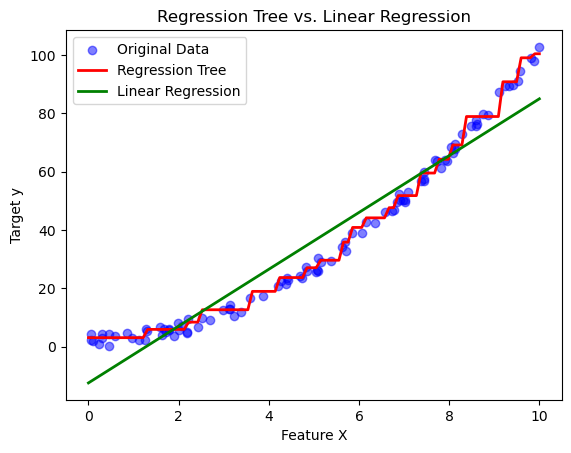

In [41]:
from sklearn.linear_model import LinearRegression

# Train the linear regression model
linear=LinearRegression()
linear.fit(X,y) # Fit model on the training data

# y_pred_linear to predict Linear regression models data points in X
y_pred_linear=linear.predict(X_test.reshape(-1,1)) # Ensuring X is 2D because in Regression tree we have X as 2D

# y_pred_tree to predict Regression tree models data points
y_pred_tree=predict(tree,X_test)

# Plot both models
plt.scatter(X, y, color="blue", label="Original Data", alpha=0.5)
plt.plot(X_test, y_pred_tree, color="red", label="Regression Tree", linewidth=2)
plt.plot(X_test, y_pred_lin, color="green", label="Linear Regression", linewidth=2)

plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.title("Regression Tree vs. Linear Regression")
plt.legend()
plt.show()

Observation : It is clearly observed that the regression tree handles the data's curved shape much better, while the linear regression is oversimplifying with just one slope. 